### 0. Importando Bibliotecas

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False
import seaborn as sns
import time
from datetime import datetime
import itertools
from itertools import combinations_with_replacement
import os
import ast
from PIL import Image
import gif

c:\Users\Samsung\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
from importlib.metadata import version
version('gif')

'3.0.0'

### 1. Definindo cenários

#### 1.1. Define 3 matrizes para problema

##### Matriz Extra Simples

In [3]:
row_1 = [0, 0, 0]
row_2 = [0, 0, 0]
row_3 = [0, -100, 0.5]
row_4 = [0, 0.5, 0.9]

matrix_extra_simple = np.matrix([row_1, row_2, row_3, row_4])

##### Matriz Simples

In [4]:
row_1 = [0, 0, 0, 0, 0]
row_2 = [0, 0, 0, 0, 0]
row_3 = [0, 0, -100, 0.5, 0.5]
row_4 = [0, 0, 0.5, 0.9, 0.9]
row_5 = [0, 0, 0.5, 0.9, 0.9]

matrix_simple = np.matrix([row_1, row_2, row_3, row_4, row_5])

##### Matriz Média

In [5]:
row_1 = [0, 0, 0, 0, 0, 0.5, 0.5, 0.5]
row_2 = [0, 0, 0, 0, 0, 0.5, 0.6, 0.6]
row_3 = [0, 0, 0, 0, 0, -100, 0.6, 0.7]
row_4 = [0, 0, -100, 0, 0, 0.5, 0.6, 0.7]
row_5 = [0, 0, 0, 0, 0, 0.5, 0.9, 0.9]
row_6 = [0, 0, 0, 0, 0, 0.5, 0.9, 0.9]
row_7 = [0, 0, 0, 0, -100, 0.5, 0.9, 0.9]
row_8 = [0, -100, 0, 0, 0, 0.5, 0.9, 0.9]

matrix_medium = np.matrix([row_1, row_2, row_3, row_4, row_5, row_6, row_7, row_8])

##### Matriz Complexa

In [6]:
row_1 = [0, 0, 0, 0, 0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
row_2 = [0, 0, 0, 0, 0, 0.5, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6]
row_3 = [0, 0, 0, 0, 0, -100, 0.6, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]
row_4 = [0, 0, -100, 0, 0, 0.5, 0.6, 0.7, 0.8, -100, 0.8, 0.8, 0.8]
row_5 = [0, 0, 0, 0, 0, 0.5, 0.6, 0.7, 0.8, 0.9, 0.9, 0.9, 0.8]
row_6 = [0, 0, 0, 0, 0, 0.5, 0.6, 0.7, 0.8, 0.9, 0.9, 0.9, 0.8]
row_7 = [0, 0, 0, 0, -100, 0.5, 0.6, 0.7, 0.8, 0.9, 0.9, 0.9, 0.8]
row_8 = [0, -100, 0, 0, 0, 0.5, 0.6, 0.7, -100, 0.8, 0.8, 0.8, 0.8]
row_9 = [0, 0, 0, 0, 0, 0.5, 0.6, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]

matrix_complex = np.matrix([row_1, row_2, row_3, row_4, row_5, row_6, row_7, row_8, row_9])

#### 1.2. Plota Matrizes

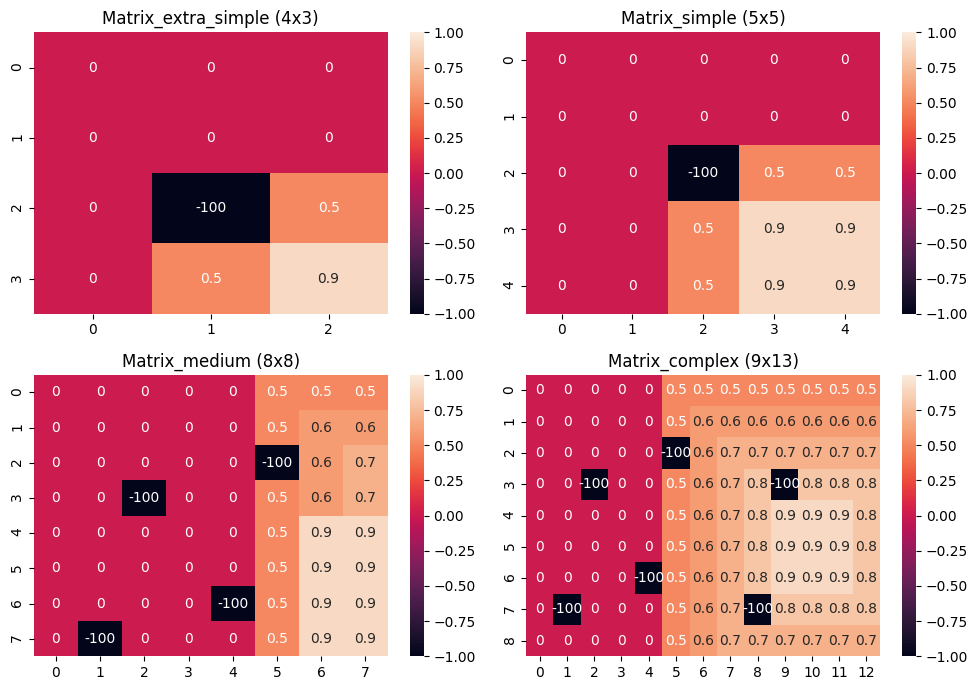

In [11]:
from matplotlib.ticker import FormatStrFormatter

# Create a figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 7))

# Assign heatmaps to each subplot using sns.heatmap
sns.heatmap(matrix_extra_simple, ax=axs[0, 0], vmin=-1, vmax=1, annot=True, fmt='g')
sns.heatmap(matrix_simple, ax=axs[0, 1], vmin=-1, vmax=1, annot=True, fmt='g')
sns.heatmap(matrix_medium, ax=axs[1, 0], vmin=-1, vmax=1, annot=True, fmt='g')
sns.heatmap(matrix_complex, ax=axs[1, 1], vmin=-1, vmax=1, annot=True, fmt='g')

# Set titles for each subplot
axs[0, 0].set_title('Matrix_extra_simple (4x3)')
axs[0, 1].set_title('Matrix_simple (5x5)')
axs[1, 0].set_title('Matrix_medium (8x8)')
axs[1, 1].set_title('Matrix_complex (9x13)')

# Modify the colorbar ticks
# cbar = ax.collections[0].colorbar
# cbar.ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

## 2. Importando Arquivos com Resultado

#### 2.1. Extrai informação dos resultados obtidos

In [12]:
# Lê arquivos de resultado de modelos Q Learning
def read_results(folder_path):

    # Create an empty dictionary to store the DataFrames
    dfs_results = {}

    # Loop through all files in the directory
    for filename in os.listdir(folder_path):
        if filename.endswith(".xlsx"):
            # Extract the name of the file without the extension
            name = os.path.splitext(filename)[0]
            # Read the XLSX file into a DataFrame and store it in the dictionary
            dfs_results[name] = pd.read_excel(os.path.join(folder_path, filename), sheet_name='results', index_col=False)
            print('donne with: ', name)

    # Print the dictionary of DataFrames
    #[print('donne with: ', key) for key in dfs_results.keys()]

    return dfs_results

#### 2.2. Extrai informação dos parametros utilizados

In [13]:
# Lê arquivos de parametros de modelos Q Learning
def read_parameters(folder_path):

    # Create an empty dictionary to store the DataFrames
    dfs_parameters = {}

    # Loop through all files in the directory
    for filename in os.listdir(folder_path):
        if filename.endswith(".xlsx"):
            # Extract the name of the file without the extension
            name = os.path.splitext(filename)[0]
            # Read the XLSX file into a DataFrame and store it in the dictionary
            dfs_parameters[name] = pd.read_excel(os.path.join(folder_path, filename), sheet_name='parameters', index_col=False)
            print('donne with: ', name)
    # Print the dictionary of DataFrames
    #[print('donne with: ', key) for key in dfs_parameters.keys()]

    return dfs_parameters

### 3. Analisando Resultados

#### 3.1. Análise Gráfica

##### 3.1.1 Gráficos de d_f por round

Para cada cenário, podemos ter um d_f ideal, visto na quantidade media de passos ate conclusao do jogo em cada cenário

In [138]:
# Cria tabela com d_f em função da quantidade de passos

d_f_08_list = []
d_f_09_list = []
d_f_095_list = []
d_f_099_list = []
d_f_0999_list = []
d_f_09999_list = []
rounds = []

for i in np.arange(0,10000,1):
    rounds.append(i)
    d_f_08_list.append(0.8**i)
    d_f_09_list.append(0.9**i)
    d_f_095_list.append(0.95**i)
    d_f_099_list.append(0.99**i)
    d_f_0999_list.append(0.999**i)
    d_f_09999_list.append(0.9999**i)

df_res_d_f = pd.DataFrame()
df_res_d_f['rounds'] = rounds
df_res_d_f['08 rate'] = d_f_08_list
df_res_d_f['09 rate'] = d_f_09_list
df_res_d_f['095 rate'] = d_f_095_list
df_res_d_f['099 rate'] = d_f_099_list
df_res_d_f['0999 rate'] = d_f_0999_list
df_res_d_f['09999 rate'] = d_f_09999_list

dfm = df_res_d_f.melt('rounds', var_name='cols', value_name='d_f rate')

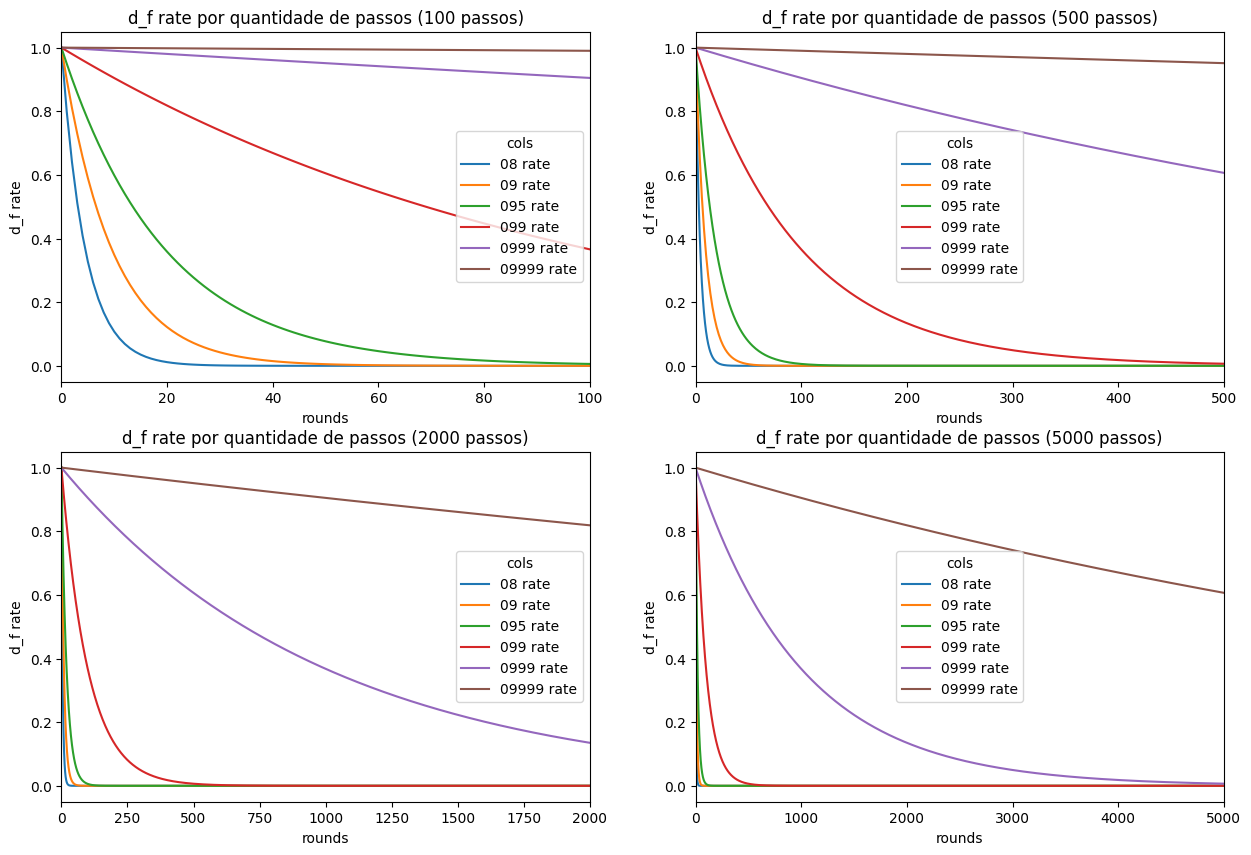

In [139]:
# Create a figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

sns.lineplot(
    data=dfm,
    x="rounds", y="d_f rate", hue="cols",
    markers=True, dashes=False, ax=axs[0, 0]
)
axs[0, 0].set_xlim(0, 100)

sns.lineplot(
    data=dfm,
    x="rounds", y="d_f rate", hue="cols",
    markers=True, dashes=False, ax=axs[0, 1]
)
axs[0, 1].set_xlim(0, 500)

sns.lineplot(
    data=dfm,
    x="rounds", y="d_f rate", hue="cols",
    markers=True, dashes=False, ax=axs[1, 0]
)
axs[1, 0].set_xlim(0, 2000)

sns.lineplot(
    data=dfm,
    x="rounds", y="d_f rate", hue="cols",
    markers=True, dashes=False, ax=axs[1, 1]
)
axs[1, 1].set_xlim(0, 5000)

# Set titles for each subplot
axs[0, 0].set_title('d_f rate por quantidade de passos (100 passos)')
axs[0, 1].set_title('d_f rate por quantidade de passos (500 passos)')
axs[1, 0].set_title('d_f rate por quantidade de passos (2000 passos)')
axs[1, 1].set_title('d_f rate por quantidade de passos (5000 passos)')

plt.show()

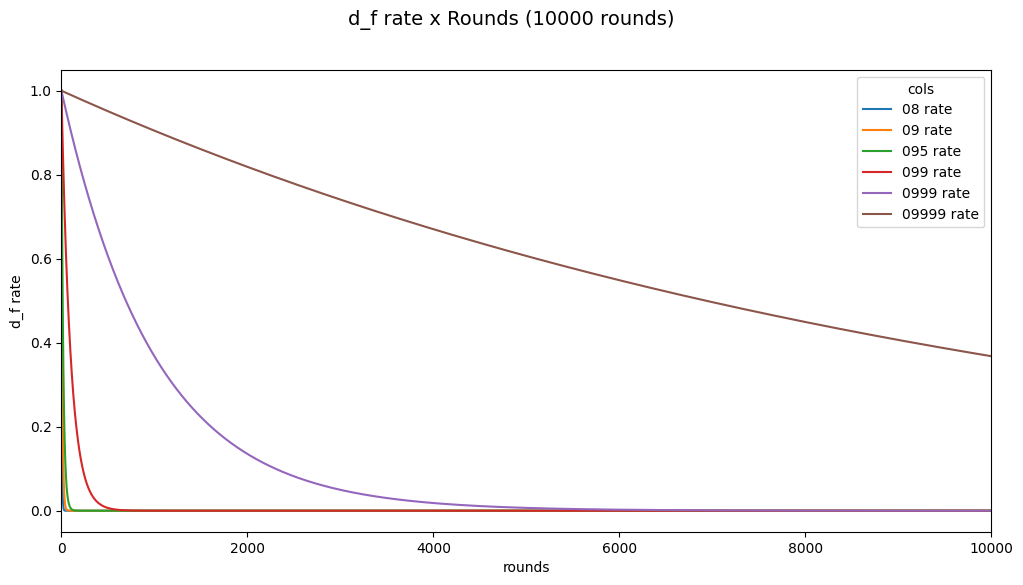

In [140]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(
    data=dfm,
    x="rounds", y="d_f rate", hue="cols",
    markers=True, dashes=False
)

fig.suptitle('d_f rate x Rounds (10000 rounds)', fontsize=14)
plt.xlim([0, 10000])
plt.show()

##### 3.1.2 Gráficos Épsilon por episódio

Como para todos os cenários iremos realizar o treinamento em 8.000 episodios, é necessário definir qual o melhor decay rate para que sejam obtidos cenários de exploração e exploitação de forma equilibrada

In [143]:
# Cria tabela com diferentes cenários de decaimento da variavel de exploração (Epsilon)

decay_rate_01_list = []
decay_rate_005_list = []
decay_rate_001_list = []
decay_rate_0005_list =[]
episodes = []

for i in np.arange(0,8000,1):
    episodes.append(i)
    decay_rate_01_list.append(0.001 + (1 - 0.01)*np.exp(-0.01*i))
    decay_rate_005_list.append(0.001 + (1 - 0.01)*np.exp(-0.005*i))
    decay_rate_001_list.append(0.001 + (1 - 0.01)*np.exp(-0.001*i))
    decay_rate_0005_list.append(0.001 + (1 - 0.01)*np.exp(-0.0005*i))

df_res_exploration = pd.DataFrame()
df_res_exploration['episodes'] = episodes
df_res_exploration['01 decay rate'] = decay_rate_01_list
df_res_exploration['005 decay rate'] = decay_rate_005_list
df_res_exploration['001 decay rate'] = decay_rate_001_list
df_res_exploration['0005 decay rate'] = decay_rate_0005_list

dfm = df_res_exploration.melt('episodes', var_name='cols', value_name='decay rate')

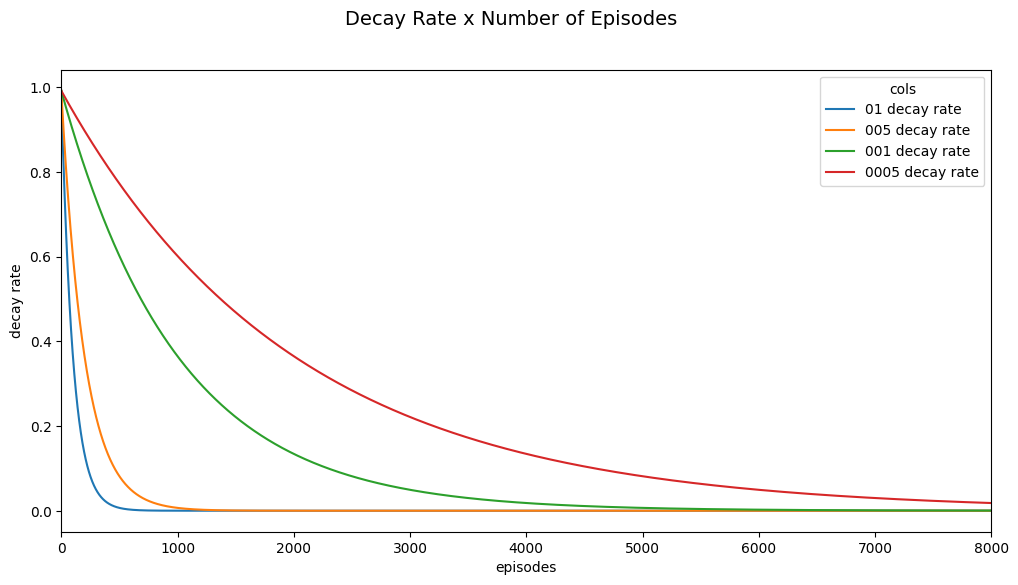

In [144]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(
    data=dfm,
    x="episodes", y="decay rate", hue="cols",
    markers=True, dashes=False
)

fig.suptitle('Decay Rate x Number of Episodes', fontsize=14)

plt.xlim([0, 8000])
plt.show()

#### 3.2. Declarando Funções úteis

##### 3.2.1. Cria dataframe de sumário de resultados obtidos

In [14]:
# Cria dataframe de sumário de resultados obtidos

def create_summary_df(dfs_results, dfs_parameters):
    # Cria listas vazias
    best_results_matrix_simple_filename = []
    best_results_matrix_simple_max_reward = []
    best_results_matrix_simple_last_reward = []
    best_results_matrix_simple_max_reward_time = []
    best_results_matrix_simple_last_reward_time = []
    best_results_matrix_simple_max_reward = []
    best_results_matrix_simple_lr = []
    best_results_matrix_simple_gamma = []
    best_results_matrix_simple_d_f = []
    best_results_matrix_simple_exp_rate = []
    best_results_matrix_simple_max_exp_rate = []
    best_results_matrix_simple_min_exp_rate = []
    best_results_matrix_simple_decay_rate = []
    best_results_matrix_simple_rounds = []
    best_results_matrix_simple_max_time_steps = []
    best_results_matrix_simple_last_time_steps = []
    best_results_matrix_simple_steps = []
    best_results_matrix_simple_avg_reward =[]
    best_results_matrix_simple_avg_reward_time = []
    best_results_matrix_simple_avg_time_steps = []
    i=0

    for key in dfs_results.keys():
        
        df_param_temp = dfs_parameters[list(dfs_results.keys())[i]]
        df_results_temp = dfs_results[list(dfs_results.keys())[i]]

        # Apenda Nome do arquivo
        best_results_matrix_simple_filename.append(key)

        # Apenda Melhor resultado de recompensa acumulada
        best_results_matrix_simple_max_reward.append(max(df_results_temp['TOTAL REWARDS']))

        # Apenda Resultado de recompensa acumulada após treinamento
        best_results_matrix_simple_last_reward.append(df_results_temp['TOTAL REWARDS'].iloc[-1])

        # Apenda Resultado de recompensa acumulada após treinamento
        best_results_matrix_simple_avg_reward.append(np.mean(df_results_temp['TOTAL REWARDS']))

        # Tempo referente ao melhor resultado
        best_results_matrix_simple_max_reward_time.append(min(df_results_temp.loc[df_results_temp['TOTAL REWARDS'] == max(df_results_temp['TOTAL REWARDS'])]['TIME']))

        # Último tempo obtido após treinamento
        best_results_matrix_simple_last_reward_time.append(df_results_temp['TIME'].iloc[-1])

        # Último tempo obtido após treinamento
        best_results_matrix_simple_avg_reward_time.append(np.mean(df_results_temp['TIME']))

        # TIMESTEPS referente ao melhor resultado
        best_results_matrix_simple_max_time_steps.append(min(df_results_temp.loc[df_results_temp['TOTAL REWARDS'] == max(df_results_temp['TOTAL REWARDS'])]['TIMESTEPS']))

        # TIMESTEPS referente ao melhor resultado
        best_results_matrix_simple_avg_time_steps.append(np.mean(df_results_temp['TIMESTEPS']))

        # Último TIMESTEPS obtido após treinamento
        best_results_matrix_simple_last_time_steps.append(df_results_temp['TIMESTEPS'].iloc[-1])

        # Apenda learning rate
        best_results_matrix_simple_lr.append(float(df_param_temp[df_param_temp['parameter name']=='lr']['parameter']))

        # Apenda gamma
        best_results_matrix_simple_gamma.append(float(df_param_temp[df_param_temp['parameter name']=='gamma']['parameter']))

        # Apenda d_f
        best_results_matrix_simple_d_f.append(float(df_param_temp[df_param_temp['parameter name']=='d_f']['parameter']))

        # Apenda exp_rate
        best_results_matrix_simple_exp_rate.append(float(df_param_temp[df_param_temp['parameter name']=='exp_rate']['parameter']))

        # Apenda max_exp_rate
        best_results_matrix_simple_max_exp_rate.append(float(df_param_temp[df_param_temp['parameter name']=='max_exp_rate']['parameter']))

        # Apenda min_exp_rate
        best_results_matrix_simple_min_exp_rate.append(float(df_param_temp[df_param_temp['parameter name']=='min_exp_rate']['parameter']))

        # Apenda decay_rate
        best_results_matrix_simple_decay_rate.append(float(df_param_temp[df_param_temp['parameter name']=='decay_rate']['parameter']))

        # Apenda rounds
        best_results_matrix_simple_rounds.append(float(df_param_temp[df_param_temp['parameter name']=='rounds']['parameter']))

        # Apenda steps
        best_results_matrix_simple_steps.append(float(df_param_temp[df_param_temp['parameter name']=='steps']['parameter']))

        i+=1

    # Cria dataframe com principais indicadores e parametros
    df_final_results = pd.DataFrame({'FILE NAME' : best_results_matrix_simple_filename,
                                    'MAX REWARD' : best_results_matrix_simple_max_reward,
                                    'LAST REWARD' : best_results_matrix_simple_last_reward,
                                    'AVG REWARD' : best_results_matrix_simple_avg_reward,
                                    'MAX REWARD TIME' : best_results_matrix_simple_max_reward_time,
                                    'LAST REWARD TIME' : best_results_matrix_simple_last_reward_time,
                                    'AVG REWARD TIME' : best_results_matrix_simple_avg_reward,
                                    'MAX REWARD TIMESTEPS' : best_results_matrix_simple_max_time_steps,
                                    'LAST REWARD TIMESTEPS' : best_results_matrix_simple_last_time_steps,
                                    'AVG REWARD TIMESTEPS' : best_results_matrix_simple_avg_time_steps,
                                    'lr' : best_results_matrix_simple_lr,
                                    'gamma' : best_results_matrix_simple_gamma,
                                    'd_f' : best_results_matrix_simple_d_f,
                                    'exp_rate' : best_results_matrix_simple_exp_rate,
                                    'max_exp_rate' : best_results_matrix_simple_max_exp_rate,
                                    'min_exp_rate' : best_results_matrix_simple_min_exp_rate,
                                    'decay_rate' : best_results_matrix_simple_decay_rate,
                                    'rounds' : best_results_matrix_simple_rounds,
                                    'steps' : best_results_matrix_simple_steps})
    
    return df_final_results


##### 3.2.2. Cria funções para filtrar tabelas e plotagem de gráficos

In [15]:
# Filtra dataframe de acordo com a dimensão da matriz estudada

def filter_df(df, matrix_dim):
    df_final_results_filtered = df[df['FILE NAME'].isin(list(filter(lambda k: matrix_dim in k, df['FILE NAME'])))]
    return df_final_results_filtered

In [16]:
# Função que recebe lista com arquivos a serem plotados, variavel a ser plotada (tempo, steps, total reward)

def plot_episodes(dfs_names_list, variable, dfs_results):
    # Seleciona apenas dfs da lista
    dfs_searched=[]
    for df_names in dfs_names_list:
        dfs_searched.append(dfs_results[df_names])

    # Concatena dfs
    dfs_concat = pd.concat(dfs_searched)

    # Calculate mean of 'x' column for each index
    mean_variable_by_episode = pd.DataFrame(dfs_concat.groupby('JOGO')[variable].mean()).reset_index()

    # Estabelece limite inferior e superior
    ci1 = 1.96 * mean_variable_by_episode[variable]/np.sqrt(len(dfs_names_list))

    # Cria gráfico com intervalo de confiança para a média dos mínimos
    fig, ax = plt.subplots(figsize=(12, 6))

    fig1 = ax.plot(mean_variable_by_episode['JOGO'],mean_variable_by_episode[variable], label="Média por Conf")
    fig1 = ax.fill_between(mean_variable_by_episode['JOGO'], (mean_variable_by_episode[variable]-ci1), (mean_variable_by_episode[variable]+ci1), color='b', alpha=.1)

    ax.legend(loc='upper right')

    plt.title(f'Média {variable} por Episódio')

    plt.ylabel(variable)

    plt.xlabel('Episódio')

    plt.show()

In [136]:
# Função que recebe lista de listas com arquivos a serem plotados, variavel a ser plotada (tempo, steps, total reward). Plota mais de uma curva no mesmo gráfico

def plot_episodes_multi(dfs_names_list_of_lists, variable, dfs_results):

    mean_variable_by_episode_total=[]
    
    # Seleciona apenas dfs da lista
    for dfs_names_list in dfs_names_list_of_lists:
        dfs_searched=[]
        for df_names in dfs_names_list:
            dfs_searched.append(dfs_results[df_names])

        # Concatena dfs
        dfs_concat = pd.concat(dfs_searched).copy()

        # Calculate mean of 'x' column for each index
        mean_variable_by_episode_total.append(pd.DataFrame(dfs_concat.groupby('JOGO')[variable].mean()).reset_index())

    # Estabelece limite inferior e superior
    ci=[]
    i=0
    plots=[]
    
    # Cria gráfico com intervalo de confiança para a média dos mínimos
    fig, ax = plt.subplots(figsize=(12, 6))
    for mean_variable_by_episode in mean_variable_by_episode_total:
        # Cria intervalos de confiança para cada curva
        ci.append(1.96 * mean_variable_by_episode[variable]/np.sqrt(len(dfs_names_list)))

        # Plota curva
        ax.plot(mean_variable_by_episode['JOGO'],mean_variable_by_episode[variable], label=f"Média por Conf {i}")
        ax.fill_between(mean_variable_by_episode['JOGO'], (mean_variable_by_episode[variable]-ci[i]), (mean_variable_by_episode[variable]+ci[i]), color='b', alpha=.1)
        
        i+=1

    ax.legend(loc='upper right')

    plt.title(f'Média {variable} por Episódio')

    plt.ylabel(variable)

    plt.xlabel('Episódio')
    
    plt.show()

In [113]:
# Função que recebe lista de listas com arquivos a serem plotados, variavel a ser plotada (tempo, steps, total reward). Plota mais de uma curva em subplots

def plot_episodes_multi_subplots(dfs_names_list_of_lists, title_list, variable, dfs_results, range, vertical_lines=False):

    mean_variable_by_episode_total=[]
    
    # Seleciona apenas dfs da lista
    for dfs_names_list in dfs_names_list_of_lists:
        dfs_searched=[]
        for df_names in dfs_names_list:
            dfs_searched.append(dfs_results[df_names])

        # Concatena dfs
        dfs_concat = pd.concat(dfs_searched).copy()

        # Calculate mean of 'x' column for each index
        mean_variable_by_episode_total.append(pd.DataFrame(dfs_concat.groupby('JOGO')[variable].mean()).reset_index())

    # Estabelece limite inferior e superior
    ci=[]
    i=0
    plots=[]
    
    # Cria gráfico com intervalo de confiança para a média dos mínimos
    fig, ax = plt.subplots(len(mean_variable_by_episode_total), figsize=(15, 10), sharex=True)

    for i, mean_variable_by_episode in enumerate(mean_variable_by_episode_total):

        # Cria intervalos de confiança para cada curva
        ci.append(1.96 * mean_variable_by_episode[variable]/np.sqrt(len(dfs_names_list)))

        # Plota curva
        ax[i].plot(mean_variable_by_episode['JOGO'],mean_variable_by_episode[variable], label=f"Média por Conf {i}")
        ax[i].fill_between(mean_variable_by_episode['JOGO'], (mean_variable_by_episode[variable]-ci[i]), (mean_variable_by_episode[variable]+ci[i]), color='b', alpha=.1)
        ax[i].set_title(f'Média {variable} por Episódio')
        ax[i].set_ylabel(variable)
        ax[i].set_ylim(range)
        if vertical_lines!= False:
        # Add vertical line
            ax[i].axvline(x=vertical_lines[i], color='red', linestyle='--')
        i+=1

    for i, title in enumerate(title_list):
        ax[i].set_title(title, fontsize=10)
    # ax.legend(loc='upper right')

    #plt.title(f'Média {variable} por Episódio')

    plt.ylabel(variable)

    plt.xlabel('Episódio')
    
    plt.show()

In [133]:
# Função que recebe lista de listas com arquivos a serem plotados, variavel a ser plotada (tempo, steps, total reward). Plota mais de uma curva em subplots

def plot_means(dfs_names_list_of_lists, variable, dfs_results, x, episode_limit):

    mean_variable_by_episode_total=[]
    
    # Seleciona apenas dfs da lista
    for dfs_names_list in dfs_names_list_of_lists:
        dfs_searched=[]
        for df_names in dfs_names_list:
            dfs_searched.append(dfs_results[df_names])

        # Concatena dfs
        dfs_concat = pd.concat(dfs_searched).copy()

        # Calculate mean of 'x' column for each index
        mean_variable_by_episode_total.append(pd.DataFrame(dfs_concat.groupby('JOGO')[variable].mean()).reset_index())

    # Estabelece limite inferior e superior
    ci=[]
    i=0
    plots=[]
    mean_lst = []
    confidence_intervals_lst = []

    # Cria gráfico com intervalo de confiança para a média dos mínimos
    fig, ax = plt.subplots(figsize=(10, 5))

    for mean_variable_by_episode in mean_variable_by_episode_total:
        df=mean_variable_by_episode[mean_variable_by_episode['JOGO']>=episode_limit]
        
        mean_lst.append(np.mean(df[variable]))
        confidence_intervals_lst.append(np.mean(1.96 * df[variable]/np.sqrt(len(dfs_names_list))))

    # Plotting the bar plot with confidence intervals
    plt.bar(x, mean_lst, tick_label=x, alpha=0.5, yerr=confidence_intervals_lst, capsize=5)

    plt.title(f'Média de TimeSteps por d_f (episódios acima de {episode_limit})')

    plt.ylabel(variable)

    plt.xlabel('Episódio')
    
    plt.show()

##### 3.2.3. Cria classes para jogar soluções obtidas e retornar melhores caminhos

In [20]:
class Play:
    # Inicializa estado do jogo
    def __init__(self, matrix_game, vtable, d_f, start = (0, 0)):

        # Define fator de perda temporal 
        self.d_f = d_f

        # Rewards (sem fator temporal)
        self.rewards_d_f=[]

        # Rewards (com fator temporal)
        self.rewards=[]

        # Define matriz de função de valor
        self.vtable = vtable

        # Define posição inicial
        self.start = (0, 0)

        # Define vetor de estados percorridos
        self.states = [self.start]

        # Define estado inicial como start
        self.state = start

        # Matriz inicial de recompensas:
        self.ini_reward_matrix = matrix_game

         # Contador de números maiores que 0 que ainda não foram percorridos
        self.count = (self.ini_reward_matrix[self.ini_reward_matrix>0]).shape[1]

        # Cria tabuleiro zerado com quantidade de colunas e linhas determinado
        self.board = np.zeros([self.ini_reward_matrix.shape[0], self.ini_reward_matrix.shape[1]])

        # Define locais com obstaculos
        i=0
        while i<= self.ini_reward_matrix.shape[0]-1:
            j=0
            while j <= self.ini_reward_matrix.shape[1]-1:
                if self.ini_reward_matrix[i, j]==-100:
                    self.board[i, j]=-100
                j+=1
            i+=1

        # Define variável de termino do jogo como False
        self.isEnd = False

    # Verifica se jogo terminou
    def isEndFunc(self):
        # Caso estado atual seja maior que 0 e ainda não tenha sido percorrido, reduz contador em 1
        if (self.state not in self.states[:-1]) and (self.ini_reward_matrix[self.state]>0):
            self.count-=1

        # Se contador é igual a zero, jogo termina
        if self.count == 0:
            self.isEnd = True

    # Verifica posição na matriz com base na ação
    def nxtPosition(self, action, state):
        """
        action: up, down, left, right

        -------------
        0 | 1 | 2| 3|
        1 |
        2 |
        return next position
        """
        if action == "up":
            nxtState = (state[0] - 1, state[1])
        elif action == "down":
            nxtState = (state[0] + 1, state[1])
        elif action == "left":
            nxtState = (state[0], state[1] - 1)
        else:
            nxtState = (state[0], state[1] + 1)

        # Se estado é legal, próximo estado, caso contrário, retorna 'MOVE NOT ALLOWED'
        if (nxtState[0] >= 0) and (nxtState[0] <= (self.ini_reward_matrix.shape[0] -1)):
            if (nxtState[1] >= 0) and (nxtState[1] <= (self.ini_reward_matrix.shape[1] -1)):
                if self.board[nxtState]!= -100:
                        return nxtState
        return 'MOVE NOT ALLOWED'
    
    # Escolhe quais caminhos legais serão avaliados 
    def legal_paths(self):
        temp_state = self.state
        legal_paths_lst = []
        i=1
        # realiza permutação de ações e avalia cada estado final como valido ou nao valido
        while i>0:
            paths = combinations_with_replacement(['up', 'down', 'left', 'right'], i)
            # Avalia cada caminho
            for path in paths:
                temp_state = self.state
                # Avalia cada movimento dentro de cada caminho e apenda em legal_paths_lst caminhos legais disponíveis
                for move in path:
                    temp_state = self.nxtPosition(move, temp_state)
                    if temp_state != 'MOVE NOT ALLOWED':
                        continue
                    else:
                        break
                # Apenda movimentos legais em lista
                if temp_state != 'MOVE NOT ALLOWED' and (temp_state not in self.states and float(self.vtable.loc[temp_state])!=0):
                    legal_paths_lst.append(path)
            i=i+1
            if len(legal_paths_lst)>0:
                break
        print('legal paths: ', legal_paths_lst)
        return legal_paths_lst
    
    # Escolhe caminho com maior recompensa
    def choose_path(self, legal_paths_lst):
        temp_state = self.state
        reward=0
        for path in legal_paths_lst:
            temp_state = self.state
            for move in path:
                 temp_state = self.nxtPosition(move, temp_state)
            nxt_reward = float(self.vtable.loc[temp_state])
            if temp_state in self.states:
                nxt_reward = 0
            if nxt_reward > reward:
                reward = nxt_reward
                final_path = path
        return final_path
    
    #def save_images(self):
        # Salva imagens
    # Joga de acordo com matriz de fução de valor associada
    def play_game(self):
        # Joga enquando jogo não terminou
        while self.isEnd==False:
            # Escolhe caminho a ser tomado
            final_path = self.choose_path(self.legal_paths())
            print('move taken: ',final_path)

            # Para cada movimento de cada caminho, agente se movimenta e appenda em listas
            for move in final_path:
                # Atualiza estado para proxima posição
                self.state = self.nxtPosition(move, self.state)

                # Apenda estado atual em vetor de estados
                self.states.append(self.state)

                # Apenda recompensa associada ao estado atual
                self.rewards.append(float(self.ini_reward_matrix[self.state]))

                # Apenda recompensa com fator temporal associada ao estado atual
                self.rewards_d_f.append(float(self.ini_reward_matrix[self.state]*(self.d_f**(len(self.states)-1))))

                # Verifica se jogo terminou
                self.isEndFunc()
                
                # Printa listas
                print('estados percorridos: ',self.states)
                print ('recompensas: ', self.rewards)
                print ('recompensas com fator temporal: ', self.rewards_d_f)
                #self.save_images(self.states)
            
        return self.states

# DEBUGAR
# if __name__ == "__main__":
#     game = Play(matrix_game = matrix_extra_simple,
#                 vtable = vtable,
#                 start = (0, 0),
#                 d_f = 0.95
#                 )
#     game.play_game()

legal paths:  [('down',), ('right',)]
move taken:  ('right',)
estados percorridos:  [(0, 0), (0, 1)]
recompensas:  [0.0]
recompensas com fator temporal:  [0.0]
legal paths:  [('down',), ('right',)]
move taken:  ('right',)
estados percorridos:  [(0, 0), (0, 1), (0, 2)]
recompensas:  [0.0, 0.0]
recompensas com fator temporal:  [0.0, 0.0]
legal paths:  [('down',)]
move taken:  ('down',)
estados percorridos:  [(0, 0), (0, 1), (0, 2), (1, 2)]
recompensas:  [0.0, 0.0, 0.0]
recompensas com fator temporal:  [0.0, 0.0, 0.0]
legal paths:  [('down',), ('left',)]
move taken:  ('down',)
estados percorridos:  [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2)]
recompensas:  [0.0, 0.0, 0.0, 0.5]
recompensas com fator temporal:  [0.0, 0.0, 0.0, 0.40725312499999994]
legal paths:  [('down',)]
move taken:  ('down',)
estados percorridos:  [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (3, 2)]
recompensas:  [0.0, 0.0, 0.0, 0.5, 0.9]
recompensas com fator temporal:  [0.0, 0.0, 0.0, 0.40725312499999994, 0.6964028437499998]
l

##### 3.2.4. Cria função para criar gif com caminho realizado

In [22]:
def create_gif(matrix, states_lst, duration, title):
    # Set the directory path to your folder of XLSX files
    folder_path = "Resultado_RL_Q_Learning/04_Imagens Temp/"

    # Get a list of all files in the folder
    file_list = os.listdir(folder_path)

    # Iterate over each file and delete them
    for file_name in file_list:
        file_path = os.path.join(folder_path, file_name)
        if os.path.isfile(file_path):  # Ensure it's a file (not a subdirectory)
            os.remove(file_path)

    gif.options.matplotlib["dpi"] = 300
    plt.rcParams["axes.grid"] = False

    i=0
    for estado in states_lst:

        fig, ax = plt.subplots()

        plt.imshow(matrix, cmap='rocket', interpolation='nearest', vmin=-1, vmax=1)

        plt.text(estado[1], estado[0], 'A', color='black', fontsize=12, ha='center', va='center')
        if i>0:
            j=1
            for j in np.arange(0,i,1):
                plt.text(states_lst[j][1], states_lst[j][0], j, color='black', fontsize=12, ha='center', va='center')
        
        # Show the grid lines in grey
        ax.set_xticks(np.arange(-.5, matrix.shape[1], 0.9999), minor=True)
        ax.set_yticks(np.arange(-.5, matrix.shape[0], 0.9999), minor=True)
        ax.grid(which='minor', color='grey', linestyle='-', linewidth=2)
        plt.xticks(np.arange(0, matrix.shape[1],1))
        plt.yticks(np.arange(0, matrix.shape[0],1))
        plt.title('title')
        # Salva Figura
        plt.savefig(f'Resultado_RL_Q_Learning/04_Imagens Temp/dataframe_{i}.png')

        if i==len(states_lst)-1:
            fig, ax = plt.subplots()
            plt.imshow(matrix, cmap='rocket', interpolation='nearest', vmin=-1, vmax=1)
            j=1
            for j in np.arange(0,i+1,1):
                plt.text(states_lst[j][1], states_lst[j][0], j, color='black', fontsize=12, ha='center', va='center')

            # Show the grid lines in grey
            ax.set_xticks(np.arange(-.5, matrix.shape[1], 0.9999), minor=True)
            ax.set_yticks(np.arange(-.5, matrix.shape[0], 0.9999), minor=True)
            ax.grid(which='minor', color='grey', linestyle='-', linewidth=2)
            plt.xticks(np.arange(0, matrix.shape[1],1))
            plt.yticks(np.arange(0, matrix.shape[0],1))
            plt.title('title')

            # Salva Figura
            plt.savefig(f'Resultado_RL_Q_Learning/04_Imagens Temp/dataframe_{i+1}.png')
        # Aumenta contador
        i=i+1

    # Create an empty dictionary to store the DataFrames
    image_list = []

    # Loop through all files in the directory
    for filename in sorted(os.listdir(folder_path)):
        for k in np.arange(0,i+1,1):
            if filename.endswith(f'_{k}.png'):
                # Add images to the list
                image = Image.open(folder_path+filename)
                image_list.append(image)

    date_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

    gif.save(image_list, f"Resultado_RL_Q_Learning/05_Gifs Temp/vtable_dim_{matrix.shape[0]}x{matrix.shape[1]}_{date_time}.gif", 
            duration=duration, unit="s", 
            between="startend")

#### 3.3. Análise Gráfica do d_f para cada configuração

##### 3.3.1. Resultado matrix_extra_simple (4x3)

In [24]:
# Leitura de soluções e sumarização

dfs_results_4x3 = read_results('Resultado_RL_Q_Learning/00_Matriz Extra Simple_4x3/00_Analise Best d_f')
dfs_param_4x3 = read_parameters('Resultado_RL_Q_Learning/00_Matriz Extra Simple_4x3/00_Analise Best d_f')
df_summary_4x3 = create_summary_df(dfs_results_4x3, dfs_param_4x3).sort_values('d_f')

donne with:  results_q_learn_dim_4x3_2023-05-30_21-04-18
donne with:  results_q_learn_dim_4x3_2023-05-30_21-04-41
donne with:  results_q_learn_dim_4x3_2023-05-30_21-47-57
donne with:  results_q_learn_dim_4x3_2023-05-30_21-49-49
donne with:  results_q_learn_dim_4x3_2023-05-30_21-50-32
donne with:  results_q_learn_dim_4x3_2023-05-30_22-41-23
donne with:  results_q_learn_dim_4x3_2023-05-30_23-00-08
donne with:  results_q_learn_dim_4x3_2023-05-30_23-53-14
donne with:  results_q_learn_dim_4x3_2023-05-30_23-53-31
donne with:  results_q_learn_dim_4x3_2023-05-31_00-14-25
donne with:  results_q_learn_dim_4x3_2023-05-31_14-03-27
donne with:  results_q_learn_dim_4x3_2023-05-31_14-07-52
donne with:  results_q_learn_dim_4x3_2023-05-31_14-20-49
donne with:  results_q_learn_dim_4x3_2023-05-31_14-22-53
donne with:  results_q_learn_dim_4x3_2023-05-31_14-47-51
donne with:  results_q_learn_dim_4x3_2023-05-31_14-59-22
donne with:  results_q_learn_dim_4x3_2023-05-31_15-14-37
donne with:  results_q_learn_di

C:\Users\Samsung\AppData\Local\Temp\ipykernel_15688\3982750993.py:62: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_results_matrix_simple_lr.append(float(df_param_temp[df_param_temp['parameter name']=='lr']['parameter']))
C:\Users\Samsung\AppData\Local\Temp\ipykernel_15688\3982750993.py:65: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_results_matrix_simple_gamma.append(float(df_param_temp[df_param_temp['parameter name']=='gamma']['parameter']))
C:\Users\Samsung\AppData\Local\Temp\ipykernel_15688\3982750993.py:68: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_results_matrix_simple_d_f.append(float(df_param_temp[df_param_temp['parameter name']=='d_f']['parameter']))
C:\Users\Samsu

In [26]:
df_summary_4x3

,FILE NAME,MAX REWARD,LAST REWARD,AVG REWARD,MAX REWARD TIME,LAST REWARD TIME,AVG REWARD TIME,MAX REWARD TIMESTEPS,LAST REWARD TIMESTEPS,AVG REWARD TIMESTEPS,lr,gamma,d_f,exp_rate,max_exp_rate,min_exp_rate,decay_rate,rounds,steps
0,results_q_learn_dim_4x3_2023-05-30_21-04-18,0.788480,0.788480,0.686435,0.117139,0.229786,0.686435,7,7,11.063375,0.01,0.99,0.8000,0.010332,1.0,0.01,0.001,8000.0,7.0
1,results_q_learn_dim_4x3_2023-05-30_21-04-41,0.788480,0.788480,0.687998,0.122864,0.213250,0.687998,7,7,11.061250,0.01,0.99,0.8000,0.010332,1.0,0.01,0.001,8000.0,7.0
2,results_q_learn_dim_4x3_2023-05-30_21-47-57,0.788480,0.788480,0.661088,0.114759,0.230852,0.661088,7,7,22.370125,0.01,0.99,0.8000,0.010332,1.0,0.01,0.001,8000.0,7.0
3,results_q_learn_dim_4x3_2023-05-30_21-49-49,0.788480,0.788480,0.660663,0.074477,0.296738,0.660663,7,7,23.013875,0.01,0.99,0.8000,0.010332,1.0,0.01,0.001,8000.0,7.0
4,results_q_learn_dim_4x3_2023-05-30_21-50-32,0.788480,0.788480,0.657450,0.093618,0.285561,0.657450,7,7,23.030875,0.01,0.99,0.8000,0.010332,1.0,0.01,0.001,8000.0,7.0
7,results_q_learn_dim_4x3_2023-05-30_23-53-14,0.788480,0.788480,0.601240,0.087934,0.177671,0.601240,7,7,50.549500,0.01,0.99,0.8000,0.010332,1.0,0.01,0.001,8000.0,7.0
8,results_q_learn_dim_4x3_2023-05-30_23-53-31,0.788480,0.788480,0.601835,0.131399,0.254145,0.601835,7,7,51.375375,0.01,0.99,0.8000,0.010332,1.0,0.01,0.001,8000.0,7.0
9,results_q_learn_dim_4x3_2023-05-31_00-14-25,0.788480,0.788480,0.590514,0.148311,0.264013,0.590514,7,7,55.150250,0.01,0.99,0.8000,0.010332,1.0,0.01,0.001,8000.0,7.0
22,results_q_learn_dim_4x3_2023-05-31_15-37-43,1.250235,1.250235,0.998980,0.045444,0.150997,0.998980,7,7,57.972250,0.01,0.99,0.9000,0.010332,1.0,0.01,0.001,8000.0,7.0
20,results_q_learn_dim_4x3_2023-05-31_15-30-47,1.250235,1.250235,0.999216,0.045602,0.108522,0.999216,7,7,54.194500,0.01,0.99,0.9000,0.010332,1.0,0.01,0.001,8000.0,7.0


In [28]:
# d_f = 0.8
df_summary_4x3['FILE NAME'][:8]

0    results_q_learn_dim_4x3_2023-05-30_21-04-18
1    results_q_learn_dim_4x3_2023-05-30_21-04-41
2    results_q_learn_dim_4x3_2023-05-30_21-47-57
3    results_q_learn_dim_4x3_2023-05-30_21-49-49
4    results_q_learn_dim_4x3_2023-05-30_21-50-32
7    results_q_learn_dim_4x3_2023-05-30_23-53-14
8    results_q_learn_dim_4x3_2023-05-30_23-53-31
9    results_q_learn_dim_4x3_2023-05-31_00-14-25
Name: FILE NAME, dtype: object

In [29]:
# d_f = 0.9
df_summary_4x3['FILE NAME'][8:20]

22    results_q_learn_dim_4x3_2023-05-31_15-37-43
20    results_q_learn_dim_4x3_2023-05-31_15-30-47
18    results_q_learn_dim_4x3_2023-05-31_15-21-26
17    results_q_learn_dim_4x3_2023-05-31_15-15-13
15    results_q_learn_dim_4x3_2023-05-31_14-59-22
16    results_q_learn_dim_4x3_2023-05-31_15-14-37
12    results_q_learn_dim_4x3_2023-05-31_14-20-49
11    results_q_learn_dim_4x3_2023-05-31_14-07-52
10    results_q_learn_dim_4x3_2023-05-31_14-03-27
6     results_q_learn_dim_4x3_2023-05-30_23-00-08
5     results_q_learn_dim_4x3_2023-05-30_22-41-23
13    results_q_learn_dim_4x3_2023-05-31_14-22-53
Name: FILE NAME, dtype: object

In [30]:
# d_f = 0.95
df_summary_4x3['FILE NAME'][20:30]

14    results_q_learn_dim_4x3_2023-05-31_14-47-51
31    results_q_learn_dim_4x3_2023-05-31_16-33-57
30    results_q_learn_dim_4x3_2023-05-31_16-31-04
27    results_q_learn_dim_4x3_2023-05-31_15-59-24
25    results_q_learn_dim_4x3_2023-05-31_15-54-56
23    results_q_learn_dim_4x3_2023-05-31_15-48-35
21    results_q_learn_dim_4x3_2023-05-31_15-33-47
36    results_q_learn_dim_4x3_2023-05-31_17-05-42
24    results_q_learn_dim_4x3_2023-05-31_15-51-17
35    results_q_learn_dim_4x3_2023-05-31_16-56-12
Name: FILE NAME, dtype: object

In [31]:
# d_f = 0.99
df_summary_4x3['FILE NAME'][30:40]

40    results_q_learn_dim_4x3_2023-05-31_17-19-37
38    results_q_learn_dim_4x3_2023-05-31_17-10-51
37    results_q_learn_dim_4x3_2023-05-31_17-06-59
48    results_q_learn_dim_4x3_2023-05-31_17-54-13
29    results_q_learn_dim_4x3_2023-05-31_16-29-06
33    results_q_learn_dim_4x3_2023-05-31_16-41-01
32    results_q_learn_dim_4x3_2023-05-31_16-34-35
28    results_q_learn_dim_4x3_2023-05-31_16-20-18
19    results_q_learn_dim_4x3_2023-05-31_15-22-38
34    results_q_learn_dim_4x3_2023-05-31_16-41-54
Name: FILE NAME, dtype: object

In [32]:
# d_f = 0.999
df_summary_4x3['FILE NAME'][40:50]

50    results_q_learn_dim_4x3_2023-05-31_18-05-29
49    results_q_learn_dim_4x3_2023-05-31_17-57-07
55    results_q_learn_dim_4x3_2023-05-31_18-18-09
45    results_q_learn_dim_4x3_2023-05-31_17-39-45
43    results_q_learn_dim_4x3_2023-05-31_17-28-25
42    results_q_learn_dim_4x3_2023-05-31_17-25-29
41    results_q_learn_dim_4x3_2023-05-31_17-20-09
26    results_q_learn_dim_4x3_2023-05-31_15-57-29
44    results_q_learn_dim_4x3_2023-05-31_17-32-20
52    results_q_learn_dim_4x3_2023-05-31_18-12-37
Name: FILE NAME, dtype: object

In [33]:
# d_f = 0.9999
df_summary_4x3['FILE NAME'][50:60]

54    results_q_learn_dim_4x3_2023-05-31_18-15-09
56    results_q_learn_dim_4x3_2023-05-31_18-40-18
57    results_q_learn_dim_4x3_2023-05-31_18-57-39
47    results_q_learn_dim_4x3_2023-05-31_17-52-18
51    results_q_learn_dim_4x3_2023-05-31_18-07-59
46    results_q_learn_dim_4x3_2023-05-31_17-44-37
39    results_q_learn_dim_4x3_2023-05-31_17-13-36
58    results_q_learn_dim_4x3_2023-05-31_19-00-44
53    results_q_learn_dim_4x3_2023-05-31_18-13-49
59    results_q_learn_dim_4x3_2023-05-31_19-07-50
Name: FILE NAME, dtype: object

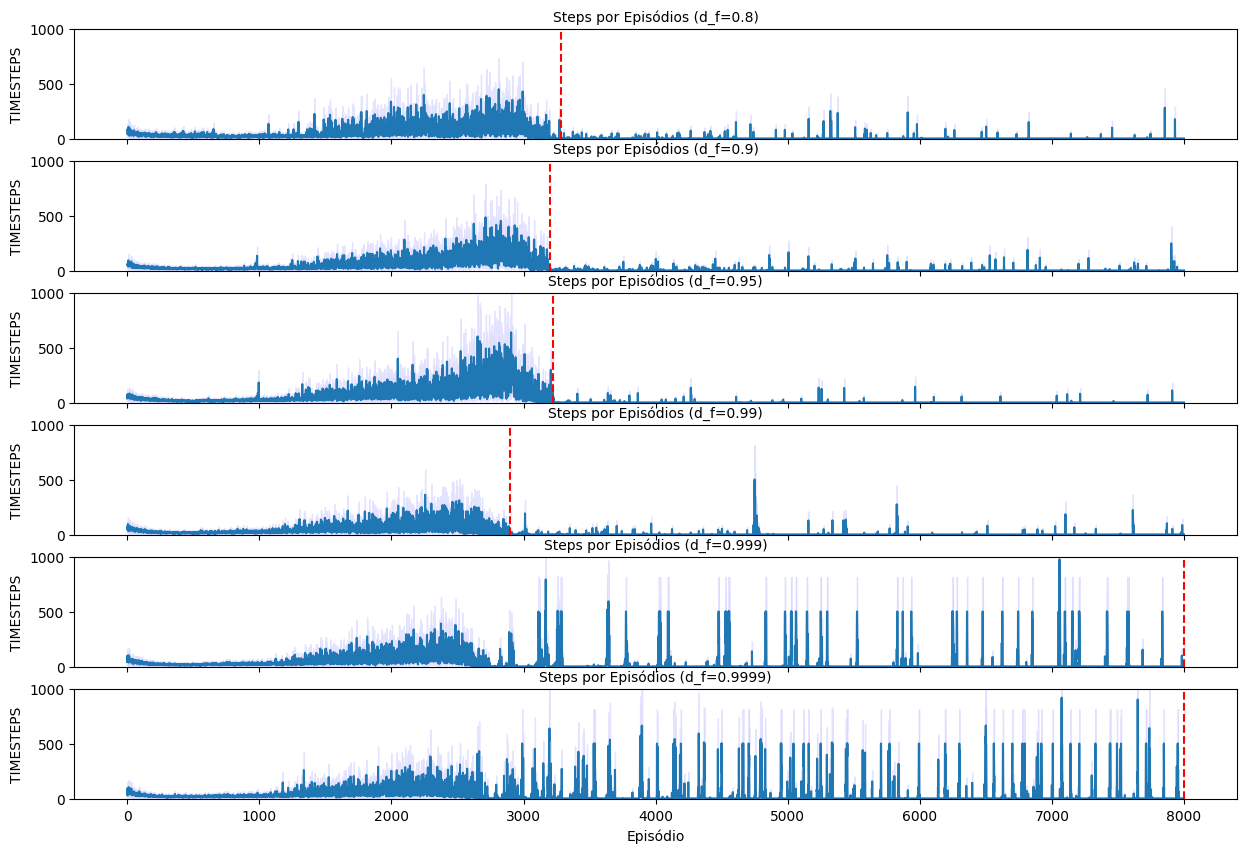

In [114]:
# Análise de timesteps por episódio, variando o d_f. É interessante a análise tanto da convergência quando da estabilidade da solução.

plot_episodes_multi_subplots([df_summary_4x3['FILE NAME'][:8], # d_f = 0.8 Conf 0
                     df_summary_4x3['FILE NAME'][8:20], # d_f = 0.90 Conf 1
                     df_summary_4x3['FILE NAME'][20:30], # d_f = 0.95 Conf 2
                     df_summary_4x3['FILE NAME'][30:40], # d_f = 0.99 Conf 3
                     df_summary_4x3['FILE NAME'][40:50], # d_f = 0.999 Conf 4
                     df_summary_4x3['FILE NAME'][50:60]], # d_f = 0.9999 Conf 5
                     ['Steps por Episódios (d_f=0.8)',
                      'Steps por Episódios (d_f=0.9)',
                      'Steps por Episódios (d_f=0.95)',
                      'Steps por Episódios (d_f=0.99)',
                      'Steps por Episódios (d_f=0.999)',
                      'Steps por Episódios (d_f=0.9999)']
                     ,
                     variable='TIMESTEPS',
                     dfs_results=dfs_results_4x3,
                     range=[0,1000],
                     vertical_lines=[3280, 3200, 3220, 2900, 8000, 8000]
                     )

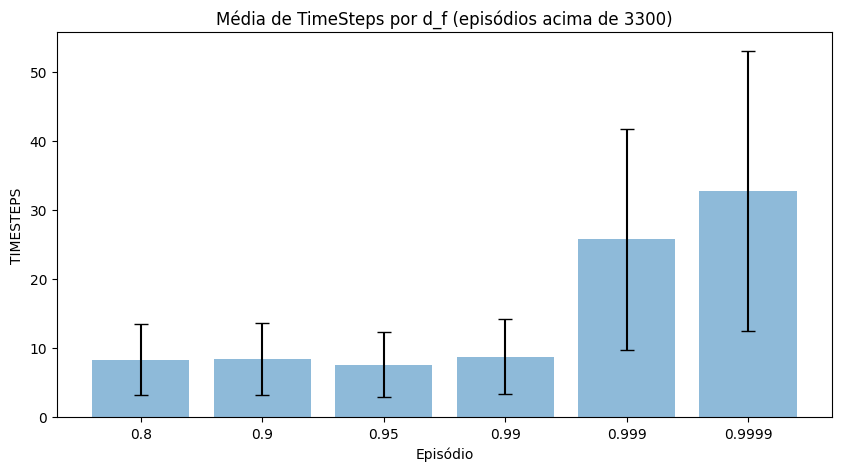

In [135]:
# Análise  da média de timesteps por d_f com intervalo de confiança para acima de 3300 episódios, quando temos convergência em todos os d_f's apesar de se observar instabilidade
# em alguns casos.

plot_means([df_summary_4x3['FILE NAME'][:8], # d_f = 0.8 Conf 0
            df_summary_4x3['FILE NAME'][8:20], # d_f = 0.90 Conf 1
            df_summary_4x3['FILE NAME'][20:30], # d_f = 0.95 Conf 2
            df_summary_4x3['FILE NAME'][30:40], # d_f = 0.99 Conf 3
            df_summary_4x3['FILE NAME'][40:50], # d_f = 0.999 Conf 4
            df_summary_4x3['FILE NAME'][50:60]], # d_f = 0.9999 Conf 5
            variable='TIMESTEPS',
            dfs_results=dfs_results_4x3,
            x=['0.8', '0.9', '0.95', '0.99', '0.999', '0.9999'],
            episode_limit = 3300
            )

##### 3.3.2. Resultado matrix_simple (5x5)

In [ ]:
# Leitura de soluções e sumarização

dfs_results_5x5 = read_results('Resultado_RL_Q_Learning/00_Matriz Extra Simple_5x5/00_Analise Best d_f')
dfs_param_5x5 = read_parameters('Resultado_RL_Q_Learning/00_Matriz Extra Simple_5x5/00_Analise Best d_f')
df_summary_5x5 = create_summary_df(dfs_results_5x5, dfs_param_5x5).sort_values('d_f')

donne with:  results_q_learn_dim_4x3_2023-05-30_21-04-18
donne with:  results_q_learn_dim_4x3_2023-05-30_21-04-41
donne with:  results_q_learn_dim_4x3_2023-05-30_21-47-57
donne with:  results_q_learn_dim_4x3_2023-05-30_21-49-49
donne with:  results_q_learn_dim_4x3_2023-05-30_21-50-32
donne with:  results_q_learn_dim_4x3_2023-05-30_22-41-23
donne with:  results_q_learn_dim_4x3_2023-05-30_23-00-08
donne with:  results_q_learn_dim_4x3_2023-05-30_23-53-14
donne with:  results_q_learn_dim_4x3_2023-05-30_23-53-31
donne with:  results_q_learn_dim_4x3_2023-05-31_00-14-25
donne with:  results_q_learn_dim_4x3_2023-05-31_14-03-27
donne with:  results_q_learn_dim_4x3_2023-05-31_14-07-52
donne with:  results_q_learn_dim_4x3_2023-05-31_14-20-49
donne with:  results_q_learn_dim_4x3_2023-05-31_14-22-53
donne with:  results_q_learn_dim_4x3_2023-05-31_14-47-51
donne with:  results_q_learn_dim_4x3_2023-05-31_14-59-22
donne with:  results_q_learn_dim_4x3_2023-05-31_15-14-37
donne with:  results_q_learn_di

C:\Users\Samsung\AppData\Local\Temp\ipykernel_15688\3982750993.py:62: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_results_matrix_simple_lr.append(float(df_param_temp[df_param_temp['parameter name']=='lr']['parameter']))
C:\Users\Samsung\AppData\Local\Temp\ipykernel_15688\3982750993.py:65: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_results_matrix_simple_gamma.append(float(df_param_temp[df_param_temp['parameter name']=='gamma']['parameter']))
C:\Users\Samsung\AppData\Local\Temp\ipykernel_15688\3982750993.py:68: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_results_matrix_simple_d_f.append(float(df_param_temp[df_param_temp['parameter name']=='d_f']['parameter']))
C:\Users\Samsu

In [ ]:
df_summary_5x5

,FILE NAME,MAX REWARD,LAST REWARD,AVG REWARD,MAX REWARD TIME,LAST REWARD TIME,AVG REWARD TIME,MAX REWARD TIMESTEPS,LAST REWARD TIMESTEPS,AVG REWARD TIMESTEPS,lr,gamma,d_f,exp_rate,max_exp_rate,min_exp_rate,decay_rate,rounds,steps
0,results_q_learn_dim_4x3_2023-05-30_21-04-18,0.788480,0.788480,0.686435,0.117139,0.229786,0.686435,7,7,11.063375,0.01,0.99,0.8000,0.010332,1.0,0.01,0.001,8000.0,7.0
1,results_q_learn_dim_4x3_2023-05-30_21-04-41,0.788480,0.788480,0.687998,0.122864,0.213250,0.687998,7,7,11.061250,0.01,0.99,0.8000,0.010332,1.0,0.01,0.001,8000.0,7.0
2,results_q_learn_dim_4x3_2023-05-30_21-47-57,0.788480,0.788480,0.661088,0.114759,0.230852,0.661088,7,7,22.370125,0.01,0.99,0.8000,0.010332,1.0,0.01,0.001,8000.0,7.0
3,results_q_learn_dim_4x3_2023-05-30_21-49-49,0.788480,0.788480,0.660663,0.074477,0.296738,0.660663,7,7,23.013875,0.01,0.99,0.8000,0.010332,1.0,0.01,0.001,8000.0,7.0
4,results_q_learn_dim_4x3_2023-05-30_21-50-32,0.788480,0.788480,0.657450,0.093618,0.285561,0.657450,7,7,23.030875,0.01,0.99,0.8000,0.010332,1.0,0.01,0.001,8000.0,7.0
7,results_q_learn_dim_4x3_2023-05-30_23-53-14,0.788480,0.788480,0.601240,0.087934,0.177671,0.601240,7,7,50.549500,0.01,0.99,0.8000,0.010332,1.0,0.01,0.001,8000.0,7.0
8,results_q_learn_dim_4x3_2023-05-30_23-53-31,0.788480,0.788480,0.601835,0.131399,0.254145,0.601835,7,7,51.375375,0.01,0.99,0.8000,0.010332,1.0,0.01,0.001,8000.0,7.0
9,results_q_learn_dim_4x3_2023-05-31_00-14-25,0.788480,0.788480,0.590514,0.148311,0.264013,0.590514,7,7,55.150250,0.01,0.99,0.8000,0.010332,1.0,0.01,0.001,8000.0,7.0
22,results_q_learn_dim_4x3_2023-05-31_15-37-43,1.250235,1.250235,0.998980,0.045444,0.150997,0.998980,7,7,57.972250,0.01,0.99,0.9000,0.010332,1.0,0.01,0.001,8000.0,7.0
20,results_q_learn_dim_4x3_2023-05-31_15-30-47,1.250235,1.250235,0.999216,0.045602,0.108522,0.999216,7,7,54.194500,0.01,0.99,0.9000,0.010332,1.0,0.01,0.001,8000.0,7.0


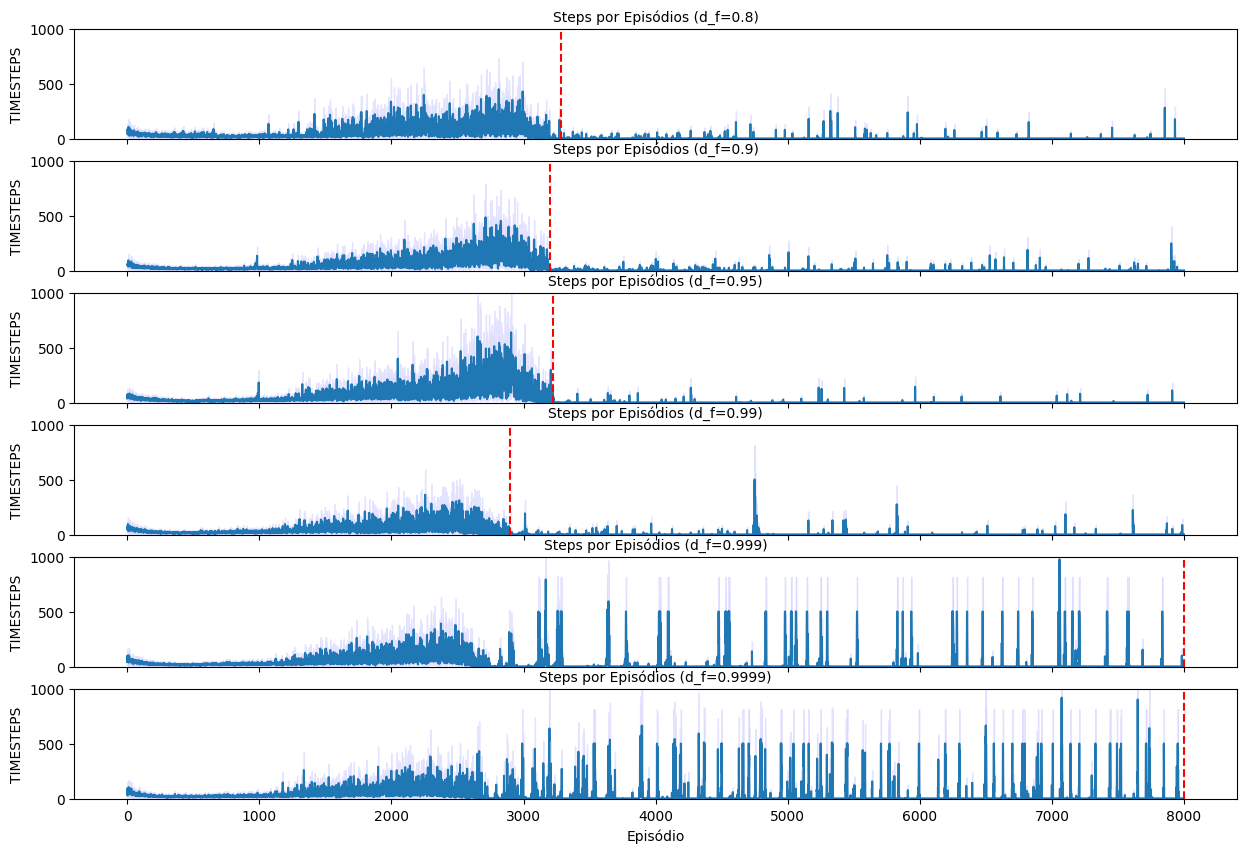

In [ ]:
# Análise de timesteps por episódio, variando o d_f. É interessante a análise tanto da convergência quando da estabilidade da solução.

plot_episodes_multi_subplots([df_summary_5x5['FILE NAME'][:8], # d_f = 0.8 Conf 0
                     df_summary_5x5['FILE NAME'][8:20], # d_f = 0.90 Conf 1
                     df_summary_5x5['FILE NAME'][20:30], # d_f = 0.95 Conf 2
                     df_summary_5x5['FILE NAME'][30:40], # d_f = 0.99 Conf 3
                     df_summary_5x5['FILE NAME'][40:50], # d_f = 0.999 Conf 4
                     df_summary_5x5['FILE NAME'][50:60]], # d_f = 0.9999 Conf 5
                     ['Steps por Episódios (d_f=0.8)',
                      'Steps por Episódios (d_f=0.9)',
                      'Steps por Episódios (d_f=0.95)',
                      'Steps por Episódios (d_f=0.99)',
                      'Steps por Episódios (d_f=0.999)',
                      'Steps por Episódios (d_f=0.9999)']
                     ,
                     variable='TIMESTEPS',
                     dfs_results=dfs_results_5x5,
                     range=[0,1000],
                     vertical_lines=[3280, 3200, 3220, 2900, 8000, 8000]
                     )

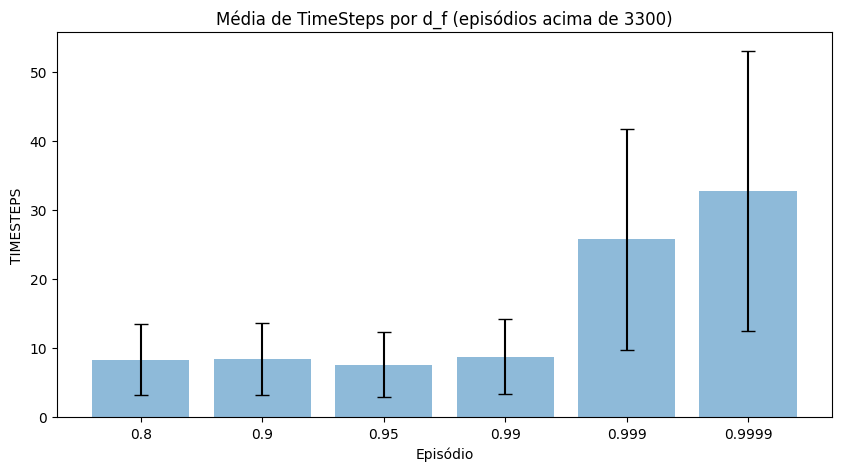

In [ ]:
# Análise  da média de timesteps por d_f com intervalo de confiança para acima de 3300 episódios, quando temos convergência em todos os d_f's apesar de se observar instabilidade
# em alguns casos.

plot_means([df_summary_5x5['FILE NAME'][:8], # d_f = 0.8 Conf 0
            df_summary_5x5['FILE NAME'][8:20], # d_f = 0.90 Conf 1
            df_summary_5x5['FILE NAME'][20:30], # d_f = 0.95 Conf 2
            df_summary_5x5['FILE NAME'][30:40], # d_f = 0.99 Conf 3
            df_summary_5x5['FILE NAME'][40:50], # d_f = 0.999 Conf 4
            df_summary_5x5['FILE NAME'][50:60]], # d_f = 0.9999 Conf 5
            variable='TIMESTEPS',
            dfs_results=dfs_results_5x5,
            x=['0.8', '0.9', '0.95', '0.99', '0.999', '0.9999'],
            episode_limit = 3300
            )

#### 3.3.3. Resultado matrix_medium (8x8)

In [ ]:
# Leitura de soluções e sumarização

dfs_results_8x8 = read_results('Resultado_RL_Q_Learning/00_Matriz Extra Simple_8x8/00_Analise Best d_f')
dfs_param_8x8 = read_parameters('Resultado_RL_Q_Learning/00_Matriz Extra Simple_8x8/00_Analise Best d_f')
df_summary_8x8 = create_summary_df(dfs_results_8x8, dfs_param_8x8).sort_values('d_f')

donne with:  results_q_learn_dim_4x3_2023-05-30_21-04-18
donne with:  results_q_learn_dim_4x3_2023-05-30_21-04-41
donne with:  results_q_learn_dim_4x3_2023-05-30_21-47-57
donne with:  results_q_learn_dim_4x3_2023-05-30_21-49-49
donne with:  results_q_learn_dim_4x3_2023-05-30_21-50-32
donne with:  results_q_learn_dim_4x3_2023-05-30_22-41-23
donne with:  results_q_learn_dim_4x3_2023-05-30_23-00-08
donne with:  results_q_learn_dim_4x3_2023-05-30_23-53-14
donne with:  results_q_learn_dim_4x3_2023-05-30_23-53-31
donne with:  results_q_learn_dim_4x3_2023-05-31_00-14-25
donne with:  results_q_learn_dim_4x3_2023-05-31_14-03-27
donne with:  results_q_learn_dim_4x3_2023-05-31_14-07-52
donne with:  results_q_learn_dim_4x3_2023-05-31_14-20-49
donne with:  results_q_learn_dim_4x3_2023-05-31_14-22-53
donne with:  results_q_learn_dim_4x3_2023-05-31_14-47-51
donne with:  results_q_learn_dim_4x3_2023-05-31_14-59-22
donne with:  results_q_learn_dim_4x3_2023-05-31_15-14-37
donne with:  results_q_learn_di

C:\Users\Samsung\AppData\Local\Temp\ipykernel_15688\3982750993.py:62: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_results_matrix_simple_lr.append(float(df_param_temp[df_param_temp['parameter name']=='lr']['parameter']))
C:\Users\Samsung\AppData\Local\Temp\ipykernel_15688\3982750993.py:65: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_results_matrix_simple_gamma.append(float(df_param_temp[df_param_temp['parameter name']=='gamma']['parameter']))
C:\Users\Samsung\AppData\Local\Temp\ipykernel_15688\3982750993.py:68: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_results_matrix_simple_d_f.append(float(df_param_temp[df_param_temp['parameter name']=='d_f']['parameter']))
C:\Users\Samsu

In [ ]:
df_summary_8x8

,FILE NAME,MAX REWARD,LAST REWARD,AVG REWARD,MAX REWARD TIME,LAST REWARD TIME,AVG REWARD TIME,MAX REWARD TIMESTEPS,LAST REWARD TIMESTEPS,AVG REWARD TIMESTEPS,lr,gamma,d_f,exp_rate,max_exp_rate,min_exp_rate,decay_rate,rounds,steps
0,results_q_learn_dim_4x3_2023-05-30_21-04-18,0.788480,0.788480,0.686435,0.117139,0.229786,0.686435,7,7,11.063375,0.01,0.99,0.8000,0.010332,1.0,0.01,0.001,8000.0,7.0
1,results_q_learn_dim_4x3_2023-05-30_21-04-41,0.788480,0.788480,0.687998,0.122864,0.213250,0.687998,7,7,11.061250,0.01,0.99,0.8000,0.010332,1.0,0.01,0.001,8000.0,7.0
2,results_q_learn_dim_4x3_2023-05-30_21-47-57,0.788480,0.788480,0.661088,0.114759,0.230852,0.661088,7,7,22.370125,0.01,0.99,0.8000,0.010332,1.0,0.01,0.001,8000.0,7.0
3,results_q_learn_dim_4x3_2023-05-30_21-49-49,0.788480,0.788480,0.660663,0.074477,0.296738,0.660663,7,7,23.013875,0.01,0.99,0.8000,0.010332,1.0,0.01,0.001,8000.0,7.0
4,results_q_learn_dim_4x3_2023-05-30_21-50-32,0.788480,0.788480,0.657450,0.093618,0.285561,0.657450,7,7,23.030875,0.01,0.99,0.8000,0.010332,1.0,0.01,0.001,8000.0,7.0
7,results_q_learn_dim_4x3_2023-05-30_23-53-14,0.788480,0.788480,0.601240,0.087934,0.177671,0.601240,7,7,50.549500,0.01,0.99,0.8000,0.010332,1.0,0.01,0.001,8000.0,7.0
8,results_q_learn_dim_4x3_2023-05-30_23-53-31,0.788480,0.788480,0.601835,0.131399,0.254145,0.601835,7,7,51.375375,0.01,0.99,0.8000,0.010332,1.0,0.01,0.001,8000.0,7.0
9,results_q_learn_dim_4x3_2023-05-31_00-14-25,0.788480,0.788480,0.590514,0.148311,0.264013,0.590514,7,7,55.150250,0.01,0.99,0.8000,0.010332,1.0,0.01,0.001,8000.0,7.0
22,results_q_learn_dim_4x3_2023-05-31_15-37-43,1.250235,1.250235,0.998980,0.045444,0.150997,0.998980,7,7,57.972250,0.01,0.99,0.9000,0.010332,1.0,0.01,0.001,8000.0,7.0
20,results_q_learn_dim_4x3_2023-05-31_15-30-47,1.250235,1.250235,0.999216,0.045602,0.108522,0.999216,7,7,54.194500,0.01,0.99,0.9000,0.010332,1.0,0.01,0.001,8000.0,7.0


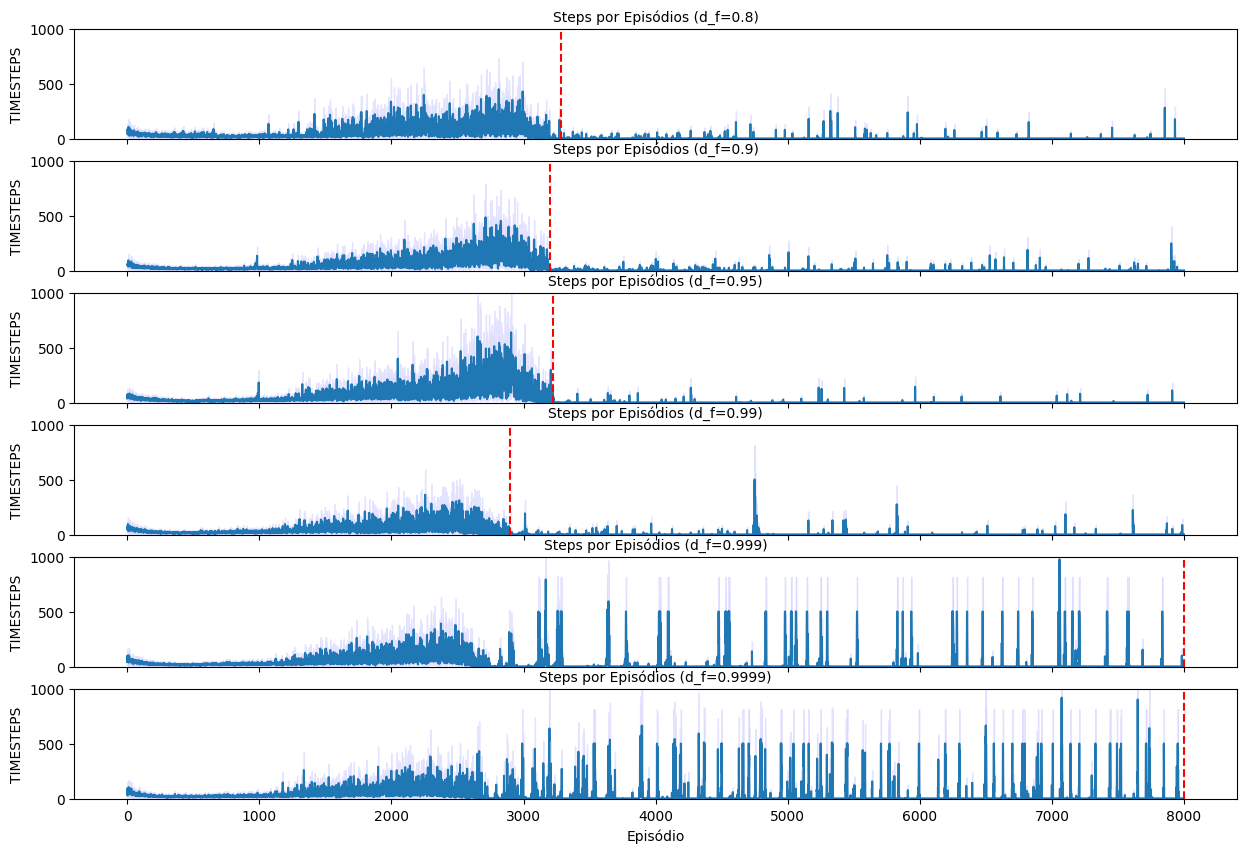

In [ ]:
# Análise de timesteps por episódio, variando o d_f. É interessante a análise tanto da convergência quando da estabilidade da solução.

plot_episodes_multi_subplots([df_summary_8x8['FILE NAME'][:8], # d_f = 0.8 Conf 0
                     df_summary_8x8['FILE NAME'][8:20], # d_f = 0.90 Conf 1
                     df_summary_8x8['FILE NAME'][20:30], # d_f = 0.95 Conf 2
                     df_summary_8x8['FILE NAME'][30:40], # d_f = 0.99 Conf 3
                     df_summary_8x8['FILE NAME'][40:50], # d_f = 0.999 Conf 4
                     df_summary_8x8['FILE NAME'][50:60]], # d_f = 0.9999 Conf 5
                     ['Steps por Episódios (d_f=0.8)',
                      'Steps por Episódios (d_f=0.9)',
                      'Steps por Episódios (d_f=0.95)',
                      'Steps por Episódios (d_f=0.99)',
                      'Steps por Episódios (d_f=0.999)',
                      'Steps por Episódios (d_f=0.9999)']
                     ,
                     variable='TIMESTEPS',
                     dfs_results=dfs_results_8x8,
                     range=[0,1000],
                     vertical_lines=[3280, 3200, 3220, 2900, 8000, 8000]
                     )

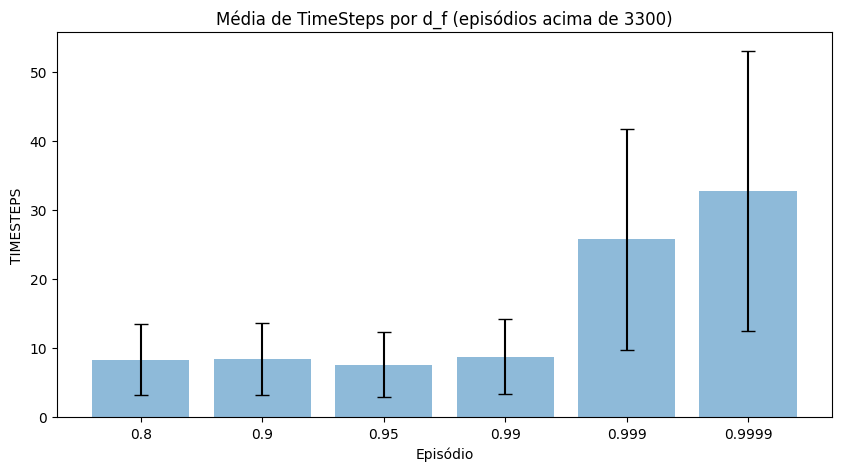

In [ ]:
# Análise  da média de timesteps por d_f com intervalo de confiança para acima de 3300 episódios, quando temos convergência em todos os d_f's apesar de se observar instabilidade
# em alguns casos.

plot_means([df_summary_8x8['FILE NAME'][:8], # d_f = 0.8 Conf 0
            df_summary_8x8['FILE NAME'][8:20], # d_f = 0.90 Conf 1
            df_summary_8x8['FILE NAME'][20:30], # d_f = 0.95 Conf 2
            df_summary_8x8['FILE NAME'][30:40], # d_f = 0.99 Conf 3
            df_summary_8x8['FILE NAME'][40:50], # d_f = 0.999 Conf 4
            df_summary_8x8['FILE NAME'][50:60]], # d_f = 0.9999 Conf 5
            variable='TIMESTEPS',
            dfs_results=dfs_results_8x8,
            x=['0.8', '0.9', '0.95', '0.99', '0.999', '0.9999'],
            episode_limit = 3300
            )

#### 3.3.4. Resultado matrix_complex (13x9)

In [ ]:
# Leitura de soluções e sumarização

dfs_results_13x9 = read_results('Resultado_RL_Q_Learning/00_Matriz Extra Simple_13x9/00_Analise Best d_f')
dfs_param_13x9 = read_parameters('Resultado_RL_Q_Learning/00_Matriz Extra Simple_13x9/00_Analise Best d_f')
df_summary_13x9 = create_summary_df(dfs_results_13x9, dfs_param_13x9).sort_values('d_f')

donne with:  results_q_learn_dim_4x3_2023-05-30_21-04-18
donne with:  results_q_learn_dim_4x3_2023-05-30_21-04-41
donne with:  results_q_learn_dim_4x3_2023-05-30_21-47-57
donne with:  results_q_learn_dim_4x3_2023-05-30_21-49-49
donne with:  results_q_learn_dim_4x3_2023-05-30_21-50-32
donne with:  results_q_learn_dim_4x3_2023-05-30_22-41-23
donne with:  results_q_learn_dim_4x3_2023-05-30_23-00-08
donne with:  results_q_learn_dim_4x3_2023-05-30_23-53-14
donne with:  results_q_learn_dim_4x3_2023-05-30_23-53-31
donne with:  results_q_learn_dim_4x3_2023-05-31_00-14-25
donne with:  results_q_learn_dim_4x3_2023-05-31_14-03-27
donne with:  results_q_learn_dim_4x3_2023-05-31_14-07-52
donne with:  results_q_learn_dim_4x3_2023-05-31_14-20-49
donne with:  results_q_learn_dim_4x3_2023-05-31_14-22-53
donne with:  results_q_learn_dim_4x3_2023-05-31_14-47-51
donne with:  results_q_learn_dim_4x3_2023-05-31_14-59-22
donne with:  results_q_learn_dim_4x3_2023-05-31_15-14-37
donne with:  results_q_learn_di

C:\Users\Samsung\AppData\Local\Temp\ipykernel_15688\3982750993.py:62: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_results_matrix_simple_lr.append(float(df_param_temp[df_param_temp['parameter name']=='lr']['parameter']))
C:\Users\Samsung\AppData\Local\Temp\ipykernel_15688\3982750993.py:65: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_results_matrix_simple_gamma.append(float(df_param_temp[df_param_temp['parameter name']=='gamma']['parameter']))
C:\Users\Samsung\AppData\Local\Temp\ipykernel_15688\3982750993.py:68: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_results_matrix_simple_d_f.append(float(df_param_temp[df_param_temp['parameter name']=='d_f']['parameter']))
C:\Users\Samsu

In [ ]:
df_summary_13x9

,FILE NAME,MAX REWARD,LAST REWARD,AVG REWARD,MAX REWARD TIME,LAST REWARD TIME,AVG REWARD TIME,MAX REWARD TIMESTEPS,LAST REWARD TIMESTEPS,AVG REWARD TIMESTEPS,lr,gamma,d_f,exp_rate,max_exp_rate,min_exp_rate,decay_rate,rounds,steps
0,results_q_learn_dim_4x3_2023-05-30_21-04-18,0.788480,0.788480,0.686435,0.117139,0.229786,0.686435,7,7,11.063375,0.01,0.99,0.8000,0.010332,1.0,0.01,0.001,8000.0,7.0
1,results_q_learn_dim_4x3_2023-05-30_21-04-41,0.788480,0.788480,0.687998,0.122864,0.213250,0.687998,7,7,11.061250,0.01,0.99,0.8000,0.010332,1.0,0.01,0.001,8000.0,7.0
2,results_q_learn_dim_4x3_2023-05-30_21-47-57,0.788480,0.788480,0.661088,0.114759,0.230852,0.661088,7,7,22.370125,0.01,0.99,0.8000,0.010332,1.0,0.01,0.001,8000.0,7.0
3,results_q_learn_dim_4x3_2023-05-30_21-49-49,0.788480,0.788480,0.660663,0.074477,0.296738,0.660663,7,7,23.013875,0.01,0.99,0.8000,0.010332,1.0,0.01,0.001,8000.0,7.0
4,results_q_learn_dim_4x3_2023-05-30_21-50-32,0.788480,0.788480,0.657450,0.093618,0.285561,0.657450,7,7,23.030875,0.01,0.99,0.8000,0.010332,1.0,0.01,0.001,8000.0,7.0
7,results_q_learn_dim_4x3_2023-05-30_23-53-14,0.788480,0.788480,0.601240,0.087934,0.177671,0.601240,7,7,50.549500,0.01,0.99,0.8000,0.010332,1.0,0.01,0.001,8000.0,7.0
8,results_q_learn_dim_4x3_2023-05-30_23-53-31,0.788480,0.788480,0.601835,0.131399,0.254145,0.601835,7,7,51.375375,0.01,0.99,0.8000,0.010332,1.0,0.01,0.001,8000.0,7.0
9,results_q_learn_dim_4x3_2023-05-31_00-14-25,0.788480,0.788480,0.590514,0.148311,0.264013,0.590514,7,7,55.150250,0.01,0.99,0.8000,0.010332,1.0,0.01,0.001,8000.0,7.0
22,results_q_learn_dim_4x3_2023-05-31_15-37-43,1.250235,1.250235,0.998980,0.045444,0.150997,0.998980,7,7,57.972250,0.01,0.99,0.9000,0.010332,1.0,0.01,0.001,8000.0,7.0
20,results_q_learn_dim_4x3_2023-05-31_15-30-47,1.250235,1.250235,0.999216,0.045602,0.108522,0.999216,7,7,54.194500,0.01,0.99,0.9000,0.010332,1.0,0.01,0.001,8000.0,7.0


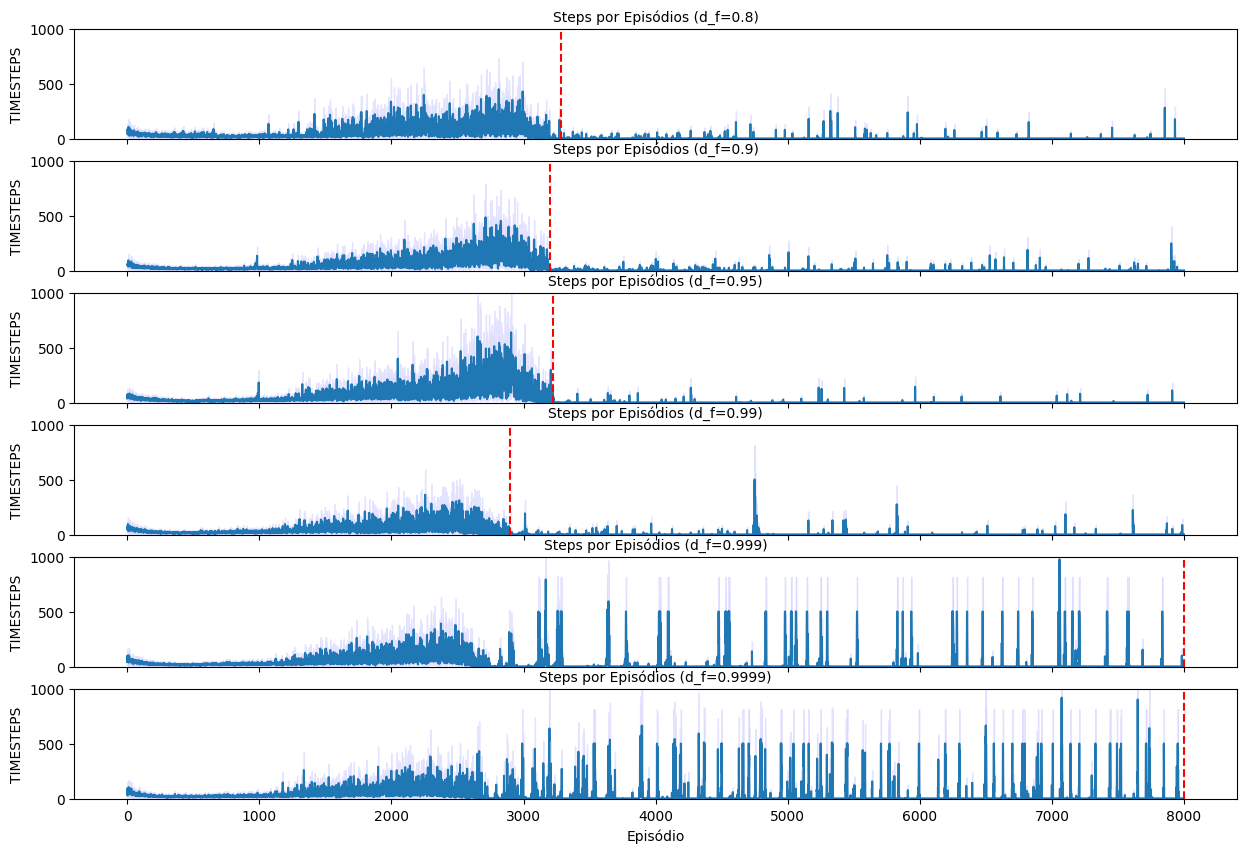

In [ ]:
# Análise de timesteps por episódio, variando o d_f. É interessante a análise tanto da convergência quando da estabilidade da solução.

plot_episodes_multi_subplots([df_summary_13x9['FILE NAME'][:8], # d_f = 0.8 Conf 0
                     df_summary_13x9['FILE NAME'][8:20], # d_f = 0.90 Conf 1
                     df_summary_13x9['FILE NAME'][20:30], # d_f = 0.95 Conf 2
                     df_summary_13x9['FILE NAME'][30:40], # d_f = 0.99 Conf 3
                     df_summary_13x9['FILE NAME'][40:50], # d_f = 0.999 Conf 4
                     df_summary_13x9['FILE NAME'][50:60]], # d_f = 0.9999 Conf 5
                     ['Steps por Episódios (d_f=0.8)',
                      'Steps por Episódios (d_f=0.9)',
                      'Steps por Episódios (d_f=0.95)',
                      'Steps por Episódios (d_f=0.99)',
                      'Steps por Episódios (d_f=0.999)',
                      'Steps por Episódios (d_f=0.9999)']
                     ,
                     variable='TIMESTEPS',
                     dfs_results=dfs_results_13x9,
                     range=[0,1000],
                     vertical_lines=[3280, 3200, 3220, 2900, 8000, 8000]
                     )

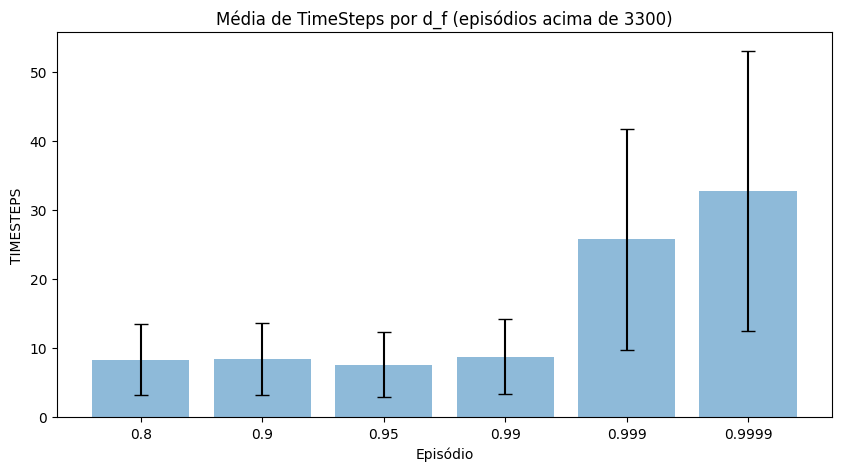

In [ ]:
# Análise  da média de timesteps por d_f com intervalo de confiança para acima de 3300 episódios, quando temos convergência em todos os d_f's apesar de se observar instabilidade
# em alguns casos.

plot_means([df_summary_13x9['FILE NAME'][:8], # d_f = 0.8 Conf 0
            df_summary_13x9['FILE NAME'][8:20], # d_f = 0.90 Conf 1
            df_summary_13x9['FILE NAME'][20:30], # d_f = 0.95 Conf 2
            df_summary_13x9['FILE NAME'][30:40], # d_f = 0.99 Conf 3
            df_summary_13x9['FILE NAME'][40:50], # d_f = 0.999 Conf 4
            df_summary_13x9['FILE NAME'][50:60]], # d_f = 0.9999 Conf 5
            variable='TIMESTEPS',
            dfs_results=dfs_results_13x9,
            x=['0.8', '0.9', '0.95', '0.99', '0.999', '0.9999'],
            episode_limit = 3300
            )

#### 3.4. Análise Gráfica do resultado final por configuração

#### 3.4.1. Resultado matrix_extra_simple (4x3)

#### 3.4.2. Resultado matrix_simple (5x5)

#### 3.4.3. Resultado matrix_medium (8x8)

#### 3.4.4. Resultado matrix_complex (13x9)

#### 3.5. Criação de Gif para as Melhores Soluções de Cada Configuração

#### 3.5.1. Resultado matrix_extra_simple (4x3)

#### 3.5.2. Resultado matrix_simple (5x5)

#### 3.5.3. Resultado matrix_medium (8x8)

#### 3.5.4. Resultado matrix_complex (13x9)